In [95]:
import numpy as np
import random
import pandas as pd
from operator import add
import matplotlib.pyplot as plt
import csv,time

class Grid():
    def __init__(self):
        # INPUTS
        self.average_outage_hr_per_day = 8
        self.average_outage_hr_per_day_stdev = 5 # hoping to find the value from the smart meters
        self.min_outage_hr_per_day = 5
        self.max_outage_hr_per_day = 11

        #grid comes online during day hours
        self.day_start_time = 10 # normal time when the grid comes online
        self.day_end_time = 16 # normal time when the grid goes offline

        #grid also comes online during evening/night hours
        self.night_start_time = 19
        self.morning_end_time = 4 #the next day 4 am

        #grid status for 24 hours in a day, initally grid is offline for 24 hours
        
        self.grid_status = [0 for i in range(0,24)]

        self.size =1
        
    def update_grid_status(self):
        outage_hr_per_day = round(abs(np.random.normal(self.average_outage_hr_per_day,  self.average_outage_hr_per_day_stdev,self.size)))
        if outage_hr_per_day < self.min_outage_hr_per_day:
            outage_hr_per_day = self.min_outage_hr_per_day    
        if outage_hr_per_day > self.max_outage_hr_per_day:
            outage_hr_per_day = self.max_outage_hr_per_day    
        
        # if grid is offline at particular hour then grid status at that hour = 1 [ but this notation is revesed later]
        for i in range(0,24):
            if self.morning_end_time < i < self.day_start_time:
                self.grid_status[i] = 1 
            if self.day_end_time < i < self.night_start_time:
                self.grid_status[i] = 1 

    #         print 'outage grid',outage_hr_per_day
        if sum(self.grid_status) < outage_hr_per_day:
            while sum(self.grid_status) <= outage_hr_per_day:
                off_hr = np.random.randint(0,24)
                self.grid_status[off_hr] = 1
                
#         invert the notation from off grid status = 1 / on grid status = 0 --> off grid status = 0 / on grid status = 1
        for i in range(0,24):
            if self.grid_status[i] == 1: self.grid_status[i] = 0
            else: self.grid_status[i] = 1             
        return self.grid_status
            
class Shop():
    def __init__(self):
        
        self.average_no_of_lights = 2.6
        self.average_no_of_lights_stdev = 2
        self.average_lights_use_hr_per_day = 5
        self.average_lights_use_hr_per_day_stdev = 2
        
        self.average_no_of_fan = 1.13
        self.average_no_of_fan_stdev = 1.57
        self.average_fan_use_hr_per_day = 3
        self.average_fan_use_hr_per_day_stdev = 2
        
        self.average_no_of_mobile = 1.3
        self.average_no_of_mobile_stdev = 1.39
        self.average_mobile_use_hr_per_day = 4
        self.average_fan_use_hr_per_day_stdev = 2
        
        self.average_no_of_laptop = .08
        self.average_no_of_laptop_stdev = .289
        self.average_laptop_use_hr_per_day = 3
        self.average_laptop_use_hr_per_day_stdev = 2
        
        self.average_no_of_fridge = .26
        self.average_no_of_fridge_stdev = .54
        self.average_fridge_use_hr_per_day = 5
        self.average_fridge_use_hr_per_day_stdev = 2
        
        self.size = 1

    def no_of_lights(self):
        no_of_lights = abs(np.random.normal(self.average_no_of_lights, self.average_no_of_lights_stdev,self.size))
        return no_of_lights
    def no_of_fan(self):
        no_of_fan = abs(np.random.normal(self.average_fan_use_hr_per_day, self.average_fan_use_hr_per_day_stdev,self.size))
        return no_of_fan
    def no_of_mobile(self):
        no_of_mobile = abs(np.random.normal(self.average_mobile_use_hr_per_day, self.average_fan_use_hr_per_day_stdev,self.size))
        return no_of_mobile
    def no_of_laptop(self):
        no_of_laptop = abs(np.random.normal(self.average_laptop_use_hr_per_day, self.average_laptop_use_hr_per_day_stdev,self.size))
        return no_of_laptop
    def no_of_fridge(self):
        no_of_fridge = abs(np.random.normal(self.average_fridge_use_hr_per_day, self.average_fridge_use_hr_per_day_stdev,self.size))
        return no_of_fridge

    
    def one_shop_load_for_year(self):
        no_of_lights = self.no_of_lights()
        no_of_fan = self.no_of_fan()
        no_of_mobile = self.no_of_mobile()
        no_of_laptop = self.no_of_laptop()
        no_of_fridge = self.no_of_fridge()
        
        n_of_l,dfLights = self.Light().lights_status_for_year_for_1_shop(no_of_lights)
        n_of_m,dfMobile = self.Mobile().mobile_status_for_year_for_1_shop(no_of_mobile)
        
        
        return n_of_l,dfLights,n_of_m,dfMobile
    
    class Light():  

        def __init__(self):
            self.rating = 5
            self.sunrise = np.random.randint(5,8 ) # start - end exclusive '
            self.sunset = np.random.randint(17,20) # start - end exclusive '
            self.average_use_hr_per_day = 2
            self.average_use_hr_per_day_stdev = 3
            self.size = 1
            self.light_status = [0 for i in range(0,24)]
            self.month = []
            self.sunrise_time = [7,7,6,5,5,5,5,5,6,6,7,7]
            self.sunset_time = [17,18,18,18,18,19,19,18,18,17,17,17]
            self.season_light_factor = [1.149,1.051,1.013,.947,.899,.876,.886,.926,.982,1.099,1.126,1.167]
        def get_average_hr_use_per_day(self,*args):      
            if args:
                usage_month = args[0]
                avg_hr = abs(np.random.normal(self.average_use_hr_per_day*self.season_light_factor[usage_month], self.average_use_hr_per_day_stdev,self.size))
            else:
                avg_hr   = np.random.normal(self.average_use_hr_per_day, self.average_use_hr_per_day_stdev,self.size)
            return avg_hr
# for one light in a Shop

        def update_light_status(self):
            hr_per_day = round(self.get_average_hr_use_per_day())
            while sum(self.light_status) <= hr_per_day:
                if np.random.randint(0,2) <= 0: 
                    on_hr = np.random.randint(0,self.sunrise) 
                else:
                    on_hr = np.random.randint(self.sunset,24)  
                    r_list.append(on_hr)
                self.light_status[on_hr] = 1
            return self.light_status
        
        
#         for 'x' no of lights in a house
        def update_light_status_for_shop(self,no_of_lights,*args):
            shop_total_light_status = [0 for i in range(0,24)]
            for i in range(0,no_of_lights):
                if args:
                    day_of_year = args[0]
                    usage_month = House().get_month_of_day_of_year(day_of_year)
                    hr_per_day = round(self.get_average_hr_use_per_day(usage_month))  
                    self.sunrise = self.sunrise_time[usage_month]
                    self.sunset = self.sunset_time[usage_month]
                else:
                    hr_per_day = round(self.get_average_hr_use_per_day())
                light_status = [0 for i in range(0,24)]
                while sum(light_status) <= (hr_per_day):
#                     print 'sum(', sum(light_status)
                    r = np.random.randint(0,2)
#                     print 'rand', r
                    if r <= 0:     
                        on_hr = np.random.randint(0,self.sunrise)
                    else:
                        on_hr = np.random.randint(self.sunset,24)   
                    if sum(light_status) >= 10:
                        extra_hr = np.random.randint(self.sunrise,self.sunset+1) 
                        light_status[extra_hr] = 1
                    light_status[on_hr] = 1
#                 print self.light_status
                shop_total_light_status = map(add,shop_total_light_status,light_status)
#             print shop_total_light_status
            return shop_total_light_status
        
        def lights_status_for_year_for_1_shop(self,*args):
            if args: no_of_l = args[0]
            else: no_of_l = int(Shop().no_of_lights())
            year_light_status = []
            for day_of_year in range(0,365):    
                year_light_status.append(self.update_light_status_for_shop(no_of_l,day_of_year))
            return no_of_l,pd.DataFrame(year_light_status)
    class fan(self):
         def __init__(self):
            self.rating = 20
            self.average_use_hr_per_day = 2
            self.average_use_hr_per_day_stdev = 3
            self.size = 1
            self.light_status = [0 for i in range(0,24)]
            self.month = []
            self.sunrise_time = [7,7,6,5,5,5,5,5,6,6,7,7]
            self.sunset_time = [17,18,18,18,18,19,19,18,18,17,17,17]
            self.season_light_factor = [1.149,1.051,1.013,.947,.899,.876,.886,.926,.982,1.099,1.126,1.167]

class House():
    def __init__(self):
        self.average_use_hr_per_day = 7.3
        self.average_use_hr_per_day_stdev = 2
        self.average_no_of_lights = 4.1
        self.average_no_of_lights_stdev = 3
        self.size = 1
        self.average_no_of_mobile = 1.5
        self.average_no_of_mobile_stdev = 1.6
#         self.house_status = [0 for i in range(0,24)]

    
#     def update_house_status(self):
#         no_of_rooms = self.No_of_rooms().get_no_of_rooms
#         lights = abs(np.random.normal(self.average_no_of_lights, self.average_no_of_lights_stdev,self.size))
#         for i in range(0,lights):
#             self.house_status[i] = self.Light().update_light_status()
    def no_of_lights(self):
        lights = abs(np.random.normal(self.average_no_of_lights, self.average_no_of_lights_stdev,self.size))
        return int(lights)
    
    def no_of_mobile(self):
        mobile = abs(np.random.normal(self.average_no_of_mobile, self.average_no_of_mobile_stdev,self.size))
        return int(mobile)
        
    def one_house_load_for_year(self):
        no_of_lights = self.no_of_lights()
        no_of_mobile = self.no_of_mobile()
        n_of_l,dfLights = self.Light().lights_status_for_year_for_1_house(no_of_lights)
        n_of_m,dfMobile = self.Mobile().mobile_status_for_year_for_1_house(no_of_mobile)
        return n_of_l,dfLights,n_of_m,dfMobile
        
#     class No_of_rooms():
#         def __init__(self):
#             self.average_no_of_rooms = 5
#             self.average_no_of_rooms_stdev = 5
#             self.size = 1
  
#         def get_no_of_rooms(self):       
#             return abs(np.random.normal(self.average_no_of_rooms, self.average_no_of_rooms_stdev,self.size))
        
    def get_month_of_day_of_year(self,day):
#         January	31
#         February	28*
#         March	31
#         April	30
#         May	31
#         June	30
#         July	31
#         August	31
#         September	30
#         October	31
#         November	30
#         December	31
        
        if 0 <= day <= 31: month = 0
        if 32 <= day <= 58: month = 1
        if 59 <= day <= 89: month = 2
        if 60 <= day <= 119: month = 3
        if 120 <= day <= 150: month = 4
        if 151 <= day <= 180: month = 5
        if 181 <= day <= 211: month = 6
        if 212 <= day <= 242: month = 7
        if 243 <= day <= 272: month = 8
        if 273 <= day <= 303: month = 9
        if 304 <= day <= 333: month = 10
        if day >= 334:  month = 11
        return month
            
    class Light():  

        def __init__(self):
            self.rating = 5
            self.sunrise = np.random.randint(5,8 ) # start - end exclusive '
            self.sunset = np.random.randint(17,20) # start - end exclusive '
            self.average_use_hr_per_day = 2
            self.average_use_hr_per_day_stdev = 3
            self.size = 1
            self.light_status = [0 for i in range(0,24)]
            self.month = []
            self.sunrise_time = [7,7,6,5,5,5,5,5,6,6,7,7]
            self.sunset_time = [17,18,18,18,18,19,19,18,18,17,17,17]
            self.season_light_factor = [1.149,1.051,1.013,.947,.899,.876,.886,.926,.982,1.099,1.126,1.167]
        def get_average_hr_use_per_day(self,*args):      
            if args:
                usage_month = args[0]
                avg_hr = abs(np.random.normal(self.average_use_hr_per_day*self.season_light_factor[usage_month], self.average_use_hr_per_day_stdev,self.size))
            else:
                avg_hr   = np.random.normal(self.average_use_hr_per_day, self.average_use_hr_per_day_stdev,self.size)
            return avg_hr
# for one light in a house

        def update_light_status(self):
            hr_per_day = round(self.get_average_hr_use_per_day())
            while sum(self.light_status) <= hr_per_day:
                if np.random.randint(0,2) <= 0: 
                    on_hr = np.random.randint(0,self.sunrise) 
                else:
                    on_hr = np.random.randint(self.sunset,24)  
                    r_list.append(on_hr)
                self.light_status[on_hr] = 1
            return self.light_status
        
        
#         for 'x' no of lights in a house
        def update_light_status_for_house(self,no_of_lights,*args):
            house_total_light_status = [0 for i in range(0,24)]
            for i in range(0,no_of_lights):
                if args:
                    day_of_year = args[0]
                    usage_month = House().get_month_of_day_of_year(day_of_year)
                    hr_per_day = round(self.get_average_hr_use_per_day(usage_month))  
                    self.sunrise = self.sunrise_time[usage_month]
                    self.sunset = self.sunset_time[usage_month]
                else:
                    hr_per_day = round(self.get_average_hr_use_per_day())
                light_status = [0 for i in range(0,24)]
                while sum(light_status) <= (hr_per_day):
#                     print 'sum(', sum(light_status)
                    r = np.random.randint(0,2)
#                     print 'rand', r
                    if r <= 0:     
                        on_hr = np.random.randint(0,self.sunrise)
                    else:
                        on_hr = np.random.randint(self.sunset,24)   
                    if sum(light_status) >= 10:
                        extra_hr = np.random.randint(self.sunrise,self.sunset+1) 
                        light_status[extra_hr] = 1
                    light_status[on_hr] = 1
#                 print self.light_status
                house_total_light_status = map(add,house_total_light_status,light_status)
#             print house_total_light_status
            return house_total_light_status
        
        def lights_status_for_year_for_1_house(self,*args):
            if args: no_of_l = args[0]
            else: no_of_l = int(House().no_of_lights())
            year_light_status = []
            for day_of_year in range(0,365):    
                year_light_status.append(self.update_light_status_for_house(no_of_l,day_of_year))
            return no_of_l,pd.DataFrame(year_light_status)
            
    
    class Mobile():
        def __init__(self):
            self.rating = 6
            self.start_mobile = 0
            self.end_mobile_time = 24
            self.charging_mobile_rating = 1
            self.average_use_hr_per_day = 3
            self.average_use_hr_per_day_stdev = 2
            self.size = 1
            self.mobile_status = [0 for i in range(0,24)]
            self.sunrise_time = [7,7,6,5,5,5,5,5,6,6,7,7]
            self.sunset_time = [17,18,18,18,18,19,19,18,18,17,17,17]

        def get_average_hr_use_per_day(self):      
            hr_use = abs(np.random.normal(self.average_use_hr_per_day, self.average_use_hr_per_day_stdev,self.size))
#             if hr_use < 2:
#                 hr_use = 2
            if hr_use > 10:
                hr_use = 10
            return hr_use

        def update_mobile_status(self):
            hr_per_day = round(self.get_average_hr_use_per_day())
            while sum(self.mobile_status) <= hr_per_day:
                on_hr = np.random.randint(self.start_mobile,self.end_mobile_time) 
                self.mobile_status[on_hr] = 1
            return self.mobile_status

        def update_mobile_status_for_house(self,no_of_mobile,*args):
            house_total_mobile_status = [0 for i in range(0,24)]
            if args:
                month = args[0]
            else:
                month = 0
            for i in range(0,no_of_mobile):
                hr_per_day = round(self.get_average_hr_use_per_day())
                self.mobile_status = [0 for i in range(0,24)]
                while sum(self.mobile_status) <= hr_per_day:
#               ******************check the assumption********************
                    on_hr = np.random.randint(self.sunrise_time[month]-2,self.sunset_time[month]+4)  
                    self.mobile_status[on_hr] = 1
                sleep_hr = 22
                mobile_standby_while_sleeping = 6 #hrs after sleep
                if self.mobile_status[sleep_hr] == 1 and sum(self.mobile_status) < 3:
                    for i in range(mobile_standby_while_sleeping):
                        standby_mode = sleep_hr+ i
                        if standby_mode > 23:
                            standby_mode = standby_mode - 24
                        self.mobile_status[standby_mode] = 0.2
                        
                house_total_mobile_status = map(add,house_total_mobile_status,self.mobile_status)
            
            return house_total_mobile_status
        
        def mobile_status_for_year_for_1_house(self,*args):
            if args: 
                no_of_m = args[0]
                if no_of_m <= 0:
                    no_of_m=1
            else: 
                no_of_m = int(House().no_of_mobile())
            year_mobile_status = []
            for day_of_year in range(0,365):    
                usage_month = House().get_month_of_day_of_year(day_of_year)
                year_mobile_status.append(self.update_mobile_status_for_house(no_of_m,usage_month))
            return no_of_m,pd.DataFrame(year_mobile_status)

        
class Mill():
    def __init__(self):
        self.rating = 10
        self.start_mill = 9
        self.end_mill_time = 19
        self.average_use_hr_per_day = 5
        self.average_use_hr_per_day_stdev = 5
        self.size = 1
        self.mill_status = [0 for i in range(0,24)]
        
    def get_average_hr_use_per_day(self):       
        return abs(np.random.normal(self.average_use_hr_per_day, self.average_use_hr_per_day_stdev,self.size))
        
    def update_mill_status(self):
        hr_per_day = round(self.get_average_hr_use_per_day())
        max_hr = self.end_mill_time-self.start_mill
        if hr_per_day > max_hr:
            hr_per_day = max_hr
        print 'hr is ',hr_per_day
        while sum(self.mill_status) <= hr_per_day:
            on_hr = np.random.randint(self.start_mill,self.end_mill_time) 
            self.mill_status[on_hr] = 1
            if hr_per_day == 10:
                extra_hr = np.random.randint(self.start_mill-1,self.end_mill_time+2) 
                self.mill_status[extra_hr] = 1
        return self.mill_status
        

    
class simulation():
    def __init__(self):
        self.no_of_simulation = 5
        self.no_of_days = 365
        self.mill_rating = 9.2 # in kW
           
#   ********for finding probabilities*********************************************************************************
    def create_mill_simulation(self):
        'for mill'
        mill_hr_simulation = []
        for i in range(0,self.no_of_days):  
            #df = pd.DataFrame(Mill().update_mill_status())
            mill_hr_simulation.append(Mill().update_mill_status())
        df = pd.DataFrame(mill_hr_simulation)*self.mill_rating 
        return df
    
    def create_mobile_simulation(self):
        'for house - mobile'
        mobile_hr_simulation = []
        for i in range(0,self.no_of_days):  
            mobile_hr_simulation.append(House().Mobile().update_mobile_status())
        return pd.DataFrame(mobile_hr_simulation)
    
    def create_lights_simulation(self):
        'for house - lights'
        light_hr_simulation = []
        for i in range(0,self.no_of_simulation + House().no_of_lights()): 
            light_hr_simulation.append(House().Light().update_light_status())
        return pd.DataFrame(light_hr_simulation)
    
    def find_probabilities(self):
        df_mill = self.create_mill_simulation()
        probabilities = df_mill.sum()/df_mill.count()
#         print 'mill', pd.DataFrame(probabilities)     
        
        df_mobile = self.create_mobile_simulation()
#         print df
        probabilities = df_mobile.sum()/df_mobile.count()
#         print 'mobile', pd.DataFrame(probabilities)
        
        df_lights = self.create_lights_simulation()
        probabilities = df_lights.sum()/df_lights.count()
#         print 'lights', pd.DataFrame(probabilities)
        
        return df_mill,df_mobile,df_lights
# ******************************************************************************************************
 
    def yearly_grid_status(self):
        grid_status = []
        for i in range(0,365):
            gs = Grid().update_grid_status()
            grid_status.append(gs)
        return pd.DataFrame(grid_status)
    
    def monte_carlo_village_load_simulation(self):
        dict_of_df = {}
        for n in range(0,self.no_of_simulation):
            name = 'Sim' + str(n)
            vl,nl,nm = village_load_simulation().village_HH_load()
            dict_of_df[name] = pd.DataFrame(vl)
        panel_village_load = pd.Panel(dict_of_df)
        return panel_village_load
    
    def monte_carlo_village_load_when_no_grid_simulation(self):
        dict_of_df = {}
        for n in range(0,self.no_of_simulation):
            name = 'Sim' + str(n)
            vl= village_load_simulation().village_load_when_no_grid()
            dict_of_df[name] = pd.DataFrame(vl)
        panel_village_load = pd.Panel(dict_of_df)
        return panel_village_load
        
class plot():
    def __init__(self):
        self.g = simulation().yearly_grid_status()
#         self.m, self.p, self.l = simulation().find_probabilities()

    def grid_outages(self):
        # grid outages df
        ng = 24 - self.g.T.sum()
        plt.hist(ng,align = 'left',bins=range(0,19),rwidth = .9,normed = 1)
        print (n, bins, patches)
        plt.xticks(range(0,19))
        plt.ylabel("Probability")
        plt.xlabel("Hrs per day")
        plt.title("Yearly Grid Outages")
        plt.show()
        %matplotlib inline
    
    def grid_hourly_outage(self):
        plt.bar(range(0,24),(365-self.g.sum())/365,align='center')
        plt.xticks(range(0,24))
        plt.xlabel("Time of day")
        plt.ylabel("Probability")
        plt.title("Hourly Outages")
        plt.show()
        %matplotlib inline
        
    def grid_availability(self):
        #plt when grid is avaiable 
        plt.figure(figsize=(15,20))
        plt.pcolor(self.g,edgecolor='k',cmap='hot')
        plt.xticks(np.arange(0.5,24.5),range(0,24))
        plt.title("Grid Avaialbility")
        plt.show()
        %matplotlib inline
        
    def light_but_no_grid_for_1_house(self):
        n,dfL = House().Light().lights_status_for_year()
        dfL_but_no_grid = (dfL[:] > 0) & (g[:] <= 0)
#         plt.pcolor((dfL[:] > 0) & (g[:] <= 0))
#         plt.colorbar()
#         plt.show()
        dfL_but_no_grid = (dfL[:] > 0) & (g[:] <= 0)
        plt.bar(range(0,24),dfL_but_no_grid.sum()/365,align='center')
        plt.xticks(range(0,24))
        plt.ylabel("Probability")
        plt.xlabel("Time of Day")
        plt.title("Unmet Light Load for House with %s lights"%n)
        plt.show()
        %matplotlib inline

    
    def mill_but_no_grid_for_1_mill(self):
        M = []
        for i in range(0,365):
            M.append(Mill().update_mill_status())
        dfM = pd.DataFrame(M)
        dfM_but_no_grid = (dfM[:] > 0) & (g[:] <= 0)
#         plt.pcolor((dfL[:] > 0) & (g[:] <= 0))
#         plt.colorbar()
#         plt.show()
        dfM_but_no_grid = (dfM[:] > 0) & (g[:] <= 0)
        plt.bar(range(0,24),dfM_but_no_grid.sum()/365,align='center')
        plt.xticks(range(0,24))
        plt.ylabel("Probability")
        plt.xlabel("Time of Day")
        plt.title("Unmet Mill Load")
        plt.show()
        %matplotlib inline
        return dfM
    
    def village_load_when_no_grid(self):
        village_load,df_village_no_of_light,df_village_no_of_mobile = village_load_simulation().village_HH_load()
        Load_but_no_grid = village_load[(village_load[:] > 0) & (self.g[:] <= 0)]
        Load_but_no_grid = Load_but_no_grid.fillna(0)
        plt.pcolor(Load_but_no_grid)
        %matplotlib inline
        plt.show()
        return Load_but_no_grid

class village_load_simulation():
    
    def __init__(self):
        self.no_of_house = 100
        self.no_of_mill = 1
        self.light_rating = 5
        self.mobile_rating = 5
        
    def village_HH_load(self):
        df_village_no_of_light = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        df_village_no_of_mobile = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        dfHouse_load = {}
        for HH in range(0,self.no_of_house):
            no_of_light,dfLight,no_of_mobile,dfMobile = House().one_house_load_for_year()
            dfHouse_load[HH]= (dfLight * self.light_rating + dfMobile** self.mobile_rating)/1000
            df_village_no_of_light = df_village_no_of_light + dfLight
            df_village_no_of_mobile = df_village_no_of_mobile + dfMobile    
        df_village_load = df_village_no_of_light * self.light_rating + df_village_no_of_mobile * self.mobile_rating
#         convert to kw
        df_village_load = df_village_load/1000
   
        return df_village_load, df_village_no_of_light, df_village_no_of_mobile, dfHouse_load
        
        
    def village_load_when_no_grid(self):
        g = simulation().yearly_grid_status()
        village_load,df_village_no_of_light,df_village_no_of_mobile, dfHouse_load = self.village_HH_load()
        Load_but_no_grid = village_load[(village_load[:] > 0) & (g[:] <= 0)]
        Load_but_no_grid = Load_but_no_grid.fillna(0)
        return Load_but_no_grid
        
        
    


In [ ]:
# two mill load to homer 
df1 = simulation().create_mill_simulation()
df2 = simulation().create_mill_simulation()
df = df1+df2
path = '/Users/Rishab/Documents/Oorja/csv/'
power = 9.2
with open(path + n + 'mill_load.txt', 'w') as txtfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',quoting = csv.QUOTE_ALL)
    for n,row in df.iterrows():
        for i in row:
#             print i * power
            p = i*power
            txtfile.write("%s \n"%p)

In [159]:
path = '/Users/Rishab/Documents/Oorja/csv/'
df = vl_n_g.mean(0)#plot().village_load_when_no_grid()
n=400 #HH no. 
with open(path + str(n) + 'HHOnly_load_when_no_grid.txt', 'w') as txtfile:
    spamwriter = csv.writer(txtfile, delimiter=' ',quoting = csv.QUOTE_ALL)
    for n,row in df.iterrows():
        for i in row:
#             print i * power
            txtfile.write("%s \n"%i)

In [ ]:
g = simulation().yearly_grid_status()
m,p,l = simulation().find_probabilities()

In [ ]:
dfM = plot().mill_but_no_grid_for_1_mill()
(dfM.T.sum()*2*50).sum()
dfM

In [ ]:
dfL_but_no_grid = (dfL[:] > 0) & (g[:] <= 0)
plt.pcolor(dfL_but_no_grid)

In [ ]:
season_light_factor = [1.149,1.051,1.013,.947,.899,.876,.886,.926,.982,1.099,1.126,1.167]
def get_average_hr_use_per_day(*args):      
    np.random.seed(0)
    if args:
        print args,season_light_factor[args[0]]
        avg_hr = abs(np.random.normal((5*season_light_factor[args[0]]), 3,1))
    else:
        avg_hr   = np.random.normal(5,3,1)
    return avg_hr

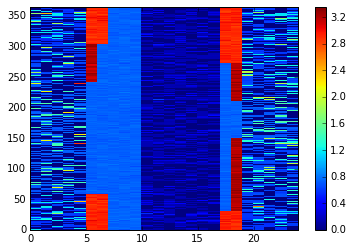

In [158]:
plt.pcolor(vl_n_g.mean(0))
plt.colorbar()

In [152]:
vl_n_g =simulation().monte_carlo_village_load_when_no_grid_simulation()



outage grid 5
outage grid 6.0
outage grid 11
outage grid 5
outage grid 5
outage grid 5
outage grid 8.0
outage grid 11
outage grid 6.0
outage grid 9.0
outage grid 6.0
outage grid 9.0
outage grid 7.0
outage grid 11
outage grid 8.0
outage grid 5.0
outage grid 11
outage grid 11
outage grid 10.0
outage grid 5
outage grid 5
outage grid 5
outage grid 6.0
outage grid 6.0
outage grid 8.0
outage grid 11
outage grid 7.0
outage grid 11
outage grid 8.0
outage grid 11.0
outage grid 5
outage grid 10.0
outage grid 9.0
outage grid 11
outage grid 5
outage grid 11
outage grid 10.0
outage grid 11.0
outage grid 9.0
outage grid 9.0
outage grid 5
outage grid 10.0
outage grid 5
outage grid 11
outage grid 8.0
outage grid 11
outage grid 11.0
outage grid 11.0
outage grid 11.0
outage grid 11.0
outage grid 5
outage grid 5
outage grid 5
outage grid 5
outage grid 5
outage grid 11
outage grid 10.0
outage grid 8.0
outage grid 8.0
outage grid 11
outage grid 11
outage grid 5
outage grid 7.0
outage grid 11
outage grid 5


In [ ]:
sim = simulation().monte_carlo_village_load_simulation()

In [138]:
test = 1
np.random.binomial(5,.2,9)


6

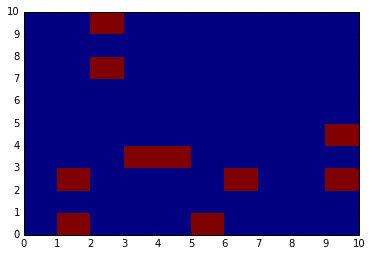

In [144]:
village = pd.DataFrame(np.zeros((10,10)))
for i in range(0,10):
    village[np.random.randint(0,10)][np.random.randint(0,10)]=1
plt.pcolor(village)

0.11


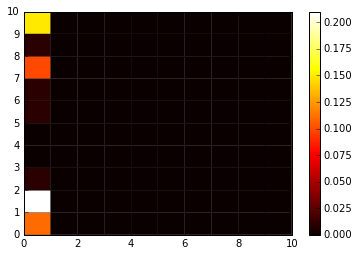

In [145]:
from IPython.html.widgets import *
%matplotlib inline
village = pd.DataFrame(np.zeros((10,10)))

def pltday(d,t):
    for hh in range(0,10):
        v = h[hh][t][d]
        village[0][hh] = v*10
    print village[0][0]
    plt.pcolor(village,edgecolor='k',cmap='hot')
    plt.colorbar()
#     plt.title(d,t)


interact(pltday, d=(0,364,1),t=(0,23,1))

In [104]:
%pylab inline
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


ValueError: Cannot save animation: no writers are available. Please install mencoder or ffmpeg to save animations.

In [ ]:
light_but_no_grid = []
for i in range(0,24):
    light_but_no_grid.append(((g-l)[i] == -1).sum())
print light_but_no_grid
plt.bar(range(0,24),light_but_no_grid)
plt.title("ads %s"%i)

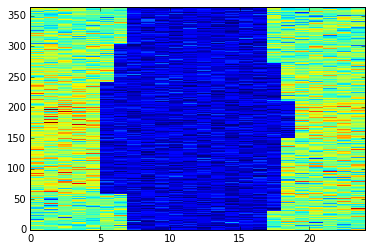

In [33]:
import time, sys
from IPython.core.display import clear_output
f, ax = plt.subplots()

for i in range(0,3):
    b = 
    ax.pcolor(b)
    time.sleep(0.1)
    clear_output()
    display(f)
    ax.cla() # turn this off if you'd like to "build up" plots
plt.close()

          0         1         2         3         4
0  0.349681  0.716521  0.841806  0.388965  0.493326
1  0.157953  0.269319  0.691950  0.297558  0.005885
2  0.845446  0.847794  0.038917  0.448228  0.072749
3  0.738188  0.242101  0.756828  0.449988  0.795379
4  0.597652  0.598619  0.825635  0.301198  0.002215


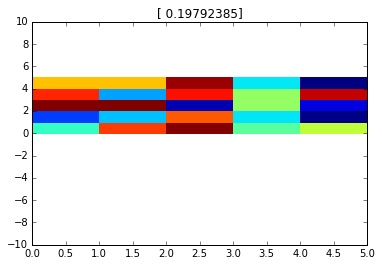

In [17]:
from IPython.html.widgets import *
%matplotlib inline
def pltsin(f):
    n = np.random.rand(5,5)
    df = pd.DataFrame(n)
    print df
    plt.pcolor(df)
    ylim(-10,10)
    plt.title(np.random.rand(1))
interact(pltsin, f=(1,10,1))

In [ ]:
'light demand but no grid'
(dfL[:] > 0) & (g[:] <= 0)
plt.pcolor((dfL[:] > 0) & (g[:] <= 0))
plt.colorbar()
plt.show()

test = (dfL[:] > 0) & (g[:] <= 0)
plt.bar(range(0,24),test.sum()/365,align='center')
plt.xticks(range(0,24))




In [ ]:
mobile_but_no_grid = []
for i in range(0,24):
    light_but_no_grid.append(((g-m)[i] == -1).sum())
print light_but_no_grid
plt.bar(range(0,24),mobile_but_no_grid)

In [ ]:
plot().grid_availability()

In [49]:
pd.DataFrame(np.ones((5,5))*np.random.rand(1))
np.random.seed(1)

0


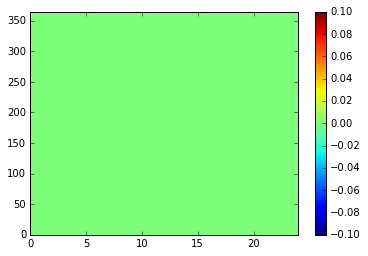

In [139]:
a,b = House().Mobile().mobile_status_for_year_for_1_house()
print a


plt.pcolor(b)
plt.colorbar()
plt.show()

%matplotlib inline

(array([ 29.,  60.,  62.,  68.,  74.,  34.,  21.,  12.,   3.,   2.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

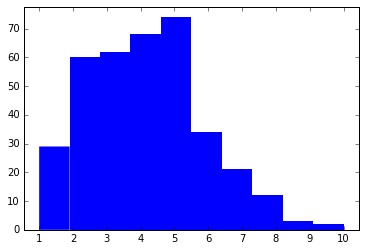

In [93]:
plt.hist(b.sum(1))

(array([ 23.,   0.,  27.,   0.,  28.,   0.,  15.,   0.,   6.,   1.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

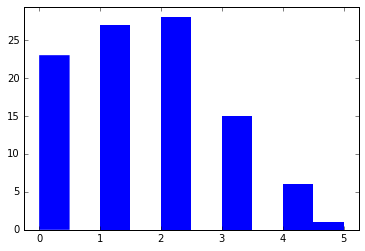

In [134]:
l = []
for i in range(100):
    a,b = House().Mobile().mobile_status_for_year_for_1_house()
    l.append(a)
plt.hist(l)

In [128]:
l.sort()
l

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 5,
 5,
 5]